In [26]:
import pandas as pd

In [27]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [30]:
df_index = pd.read_csv("HeightWeight.csv")

In [93]:
df = df_index.drop(columns=["Index"])
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


Text(0, 0.5, 'Weight(Pounds)')

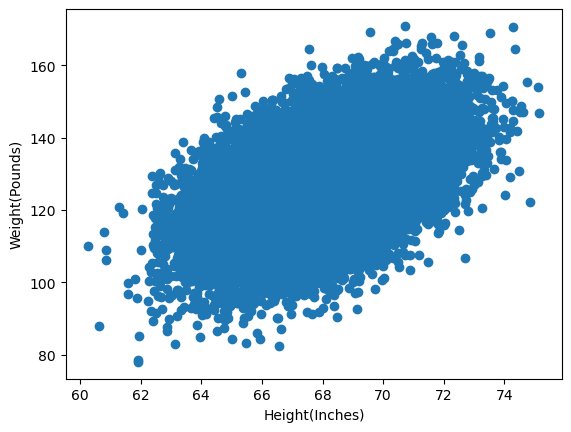

In [32]:
plt.scatter(df["Height(Inches)"],df["Weight(Pounds)"])
plt.xlabel("Height(Inches)")
plt.ylabel("Weight(Pounds)")

In [33]:
##Correlation

df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


C:\Users\aniru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniru\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


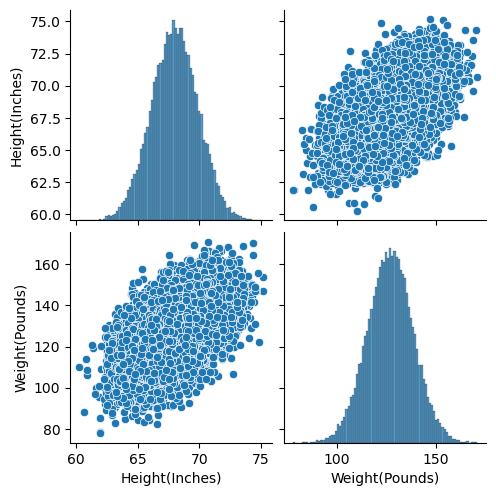

In [34]:
import seaborn as sns
sns.pairplot(df)

In [39]:
#Independent and dependent features

X = df[["Weight(Pounds)"]]###INDEPENDENT features should be data frame or 2 dimensional array
X.shape
X.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [41]:
y = df["Height(Inches)"] ###This variable can be in series or 1 dimensional array
y.head()

0    65.78331
1    71.51521
2    69.39874
3    68.21660
4    67.78781
Name: Height(Inches), dtype: float64

In [42]:
##Train test split

from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [45]:
X_train

,Weight(Pounds)
6920,128.0357
17926,115.5202
1123,132.8885
4518,120.5416
5576,122.7718
...,...
21575,111.5242
5390,123.4431
860,120.9809
15795,135.6468


In [46]:
X_train.shape

(18750, 1)

In [47]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [58]:
X_test = scaler.transform(X_test)
X_test

array([[134.2855],
       [111.9666],
       [135.9871],
       ...,
       [135.6679],
       [113.4876],
       [127.0979]])

In [59]:
#Apply Simple Linear Regression 

from sklearn.linear_model import LinearRegression

In [62]:
regression = LinearRegression(n_jobs = -1)

In [67]:
print("Co-efficiecnt or slope : " ,regression.coef_) # This is the value of B1 (beta one)
print("Intercept : ",regression.intercept_)

Co-efficiecnt or slope :  [0.94883892]
Intercept :  67.9938252704


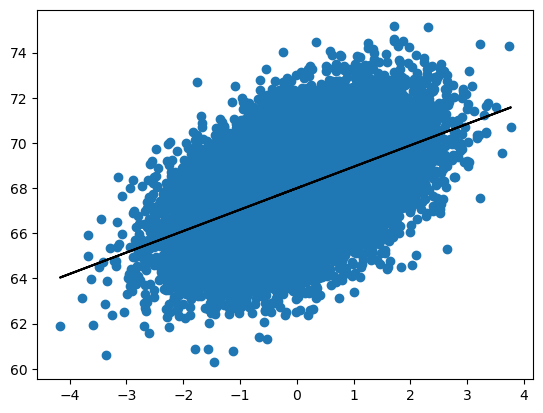

In [73]:
## Plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="black")

In [74]:
## Prediction for test data
y_predict = regression.predict(X_test)

In [76]:
## Performance matric
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [78]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mse)

print("Mean Squared Error : ",mse)
print("Mean Absulate Error : ",mae)
print("RMSE : ",rmse)

Mean Squared Error :  14652.968922740305
Mean Absulate Error :  120.60971028375369
RMSE :  121.04944825458853


In [79]:
import statsmodels.api as sm

In [80]:
model = sm.OLS(y_train,X_train).fit()

In [81]:
predict = model.predict(X_test)
print(predict)

[127.41530904 106.23826802 129.02985334 ... 128.72698396 107.68145202
 120.5954344 ]


In [82]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                      0.0561
Time:                        22:50:29   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
## Predication for the new data 
regression.predict(scaler.transform([[67.52918]]))

array([132.06813961])